In [1]:
from yellowbrick.datasets import load_occupancy
from yellowbrick.features import ParallelCoordinates

# Load the classification data set
X, y = load_occupancy(return_dataset=True).to_pandas()

In [2]:
# Specify the features of interest and the classes of the target
features = [
    "temperature", "relative humidity", "light", "CO2", "humidity"
]
classes = ["unoccupied", "occupied"]

In [3]:
X = X[features]

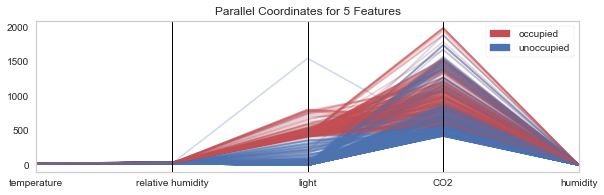

In [4]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True,
    color=["#4C72B0", "#C44E52"], size=(700,200)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.poof()

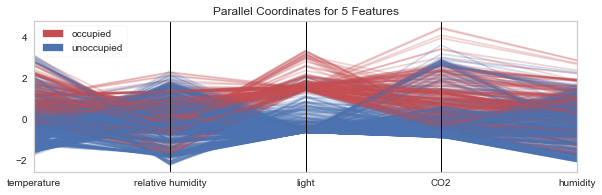

In [5]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, normalize='standard',
    sample=0.05, shuffle=True, color=["#4C72B0", "#C44E52"],
    size=(700,200)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.poof()

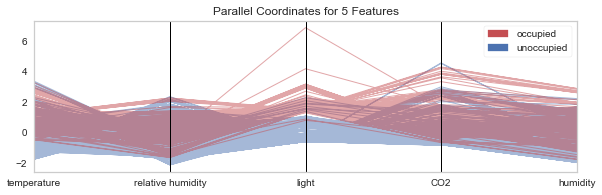

In [6]:
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, shuffle=True,
    normalize='standard', fast=True, color=["#4C72B0", "#C44E52"],
    size=(700,200)
)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.poof()

In [7]:
import time
import matplotlib.pyplot as plt
from yellowbrick.features import ParallelCoordinates
import pandas as pd
import numpy as np


def plot_speedup(trials=5, factors=np.arange(1, 11)):

    def pcoords_time(X, y, fast=True):
        _, ax = plt.subplots()
        oz = ParallelCoordinates(fast=fast, ax=ax)

        start = time.time()
        oz.fit_transform(X, y)
        delta = time.time() - start

        plt.cla()        # clear current axis
        plt.clf()        # clear current figure
        plt.close("all") # close all existing plots

        return delta

    def pcoords_speedup(X, y):
        fast_time = pcoords_time(X, y, fast=True)
        slow_time = pcoords_time(X, y, fast=False)

        return slow_time / fast_time

    X,y = load_occupancy(return_dataset=True).to_numpy()

    speedups = []
    variance = []

    for factor in factors:
        X = np.repeat(X, factor, axis=0)
        y = np.repeat(y, factor, axis=0)

        local_speedups = []
        for trial in range(trials):
            local_speedups.append(pcoords_speedup(X, y))

        local_speedups = np.array(local_speedups)
        speedups.append(local_speedups.mean())
        variance.append(local_speedups.std())

    speedups = np.array(speedups)
    variance = np.array(variance)

    series = pd.Series(speedups, index=factors)
    _, ax = plt.subplots(figsize=(9,6))
    series.plot(ax=ax, marker='o', label="speedup factor", color="#C44E52")

    # Plot one standard deviation above and below the mean
    ax.fill_between(
        factors, speedups - variance, speedups + variance, alpha=0.25,
        color="#C44E52",
    )

    ax.set_ylabel("Speedup")
    ax.set_xlabel("Data size (# repeats)")
    ax.set_title("Speed Improvement of Fast Parallel Coordinates")
    plt.show()

In [ ]:
plot_speedup()

KeyboardInterrupt: 